In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import math

%matplotlib inline

In [2]:
# Generate Dataset
np.random.seed(4)
population_ages1 = stats.poisson.rvs(mu=35, size=150000)
population_ages2 = stats.poisson.rvs(mu=20, size=100000)

population_ages = np.concatenate((population_ages1, population_ages2))
print population_ages[150001:150005]
population_ages.mean()



[20 23 21 22]


28.998624

In [3]:
np.random.seed(2)
sample_ages = np.random.choice(a=population_ages, size=500)
print 'sample mean', sample_ages.mean()
print 'Population age 1 Mean', population_ages1.mean()
print 'Population age 2 Mean', population_ages2.mean()
print 'Population age Mean', population_ages.mean()
print 'error: ', sample_ages.mean() - population_ages.mean()

sample mean 29.082
Population age 1 Mean 34.9940066667
Population age 2 Mean 20.00555
Population age Mean 28.998624
error:  0.083376


In [4]:
population_races = (["white"]*100000) + (["black"]*50000) +\
                   (["hispanic"]*50000) + (["asian"]*25000) +\
                   (["other"]*25000)
print population_races[0:5]
print population_races[100000:100005]
print len(population_races)
# demo_sample = random.sample(population_races, 1000)   # Sample 1000 values

for race in set(population_races):
    print race, " proportion estimate:", float(population_races.count(race))/len(population_races) 

['white', 'white', 'white', 'white', 'white']
['black', 'black', 'black', 'black', 'black']
250000
hispanic  proportion estimate: 0.2
white  proportion estimate: 0.4
other  proportion estimate: 0.1
black  proportion estimate: 0.2
asian  proportion estimate: 0.1


In [5]:
np.random.seed(2)
sample_races = random.sample(population_races,1000)
print 'Sample production'
for race in set(population_races):
    print race, " proportion estimate:", float(sample_races.count(race))/len(sample_races) 

Sample production
hispanic  proportion estimate: 0.191
white  proportion estimate: 0.41
other  proportion estimate: 0.092
black  proportion estimate: 0.204
asian  proportion estimate: 0.103


In [9]:
np.random.seed(8)
sample_size = 1000
sample_ages = np.random.choice(a=population_ages, size=1000)
sample_mean = sample_ages.mean()
print 'Sample mean: ', sample_ages.mean()
z_critical = stats.norm.ppf(q = 0.975)
print 'Z value', z_critical

sample_stdev = sample_ages.std()
population_stdev = population_ages.std()

margin_of_error = z_critical * (sample_stdev/math.sqrt(sample_size))
confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)
print ("Confidence interval: ")
print confidence_interval
print 'Interval Range: ', 2 * margin_of_error

Sample mean:  29.213
Z value 1.95996398454
Confidence interval: 
(28.66107737492915, 29.764922625070852)
Interval Range:  1.10384525014


In [13]:
# Repeat 25 times
np.random.seed(8)
sample_size = 1000
population_stdev = population_ages.std()
intervals = []
sample_means = []
for i in range(25):
    sample_ages = np.random.choice(a=population_ages, size=1000)
    sample_mean = sample_ages.mean()
    print 'Sample Mean: ', sample_ages.mean()
    z_critical = stats.norm.ppf(q = 0.975)
    margin_of_error = z_critical * (population_stdev/math.sqrt(sample_size))
    confidence_interval = (sample_mean - margin_of_error,
                       sample_mean + margin_of_error)
    intervals.append(confidence_interval)
    sample_means.append(sample_mean)
print intervals

Sample Mean:  29.213
Sample Mean:  28.799
Sample Mean:  28.813
Sample Mean:  28.941
Sample Mean:  28.851
Sample Mean:  29.119
Sample Mean:  28.849
Sample Mean:  29.32
Sample Mean:  28.945
Sample Mean:  28.774
Sample Mean:  28.766
Sample Mean:  29.038
Sample Mean:  28.921
Sample Mean:  29.247
Sample Mean:  29.024
Sample Mean:  28.872
Sample Mean:  28.725
Sample Mean:  28.865
Sample Mean:  29.137
Sample Mean:  28.706
Sample Mean:  28.945
Sample Mean:  29.007
Sample Mean:  29.042
Sample Mean:  29.21
Sample Mean:  29.05
[(28.648142983390933, 29.777857016609069), (28.234142983390932, 29.363857016609067), (28.248142983390927, 29.37785701660907), (28.376142983390928, 29.50585701660907), (28.286142983390931, 29.415857016609067), (28.554142983390932, 29.683857016609068), (28.284142983390929, 29.413857016609072), (28.755142983390932, 29.884857016609068), (28.380142983390932, 29.509857016609068), (28.209142983390933, 29.338857016609069), (28.20114298339093, 29.330857016609066), (28.47314298339092

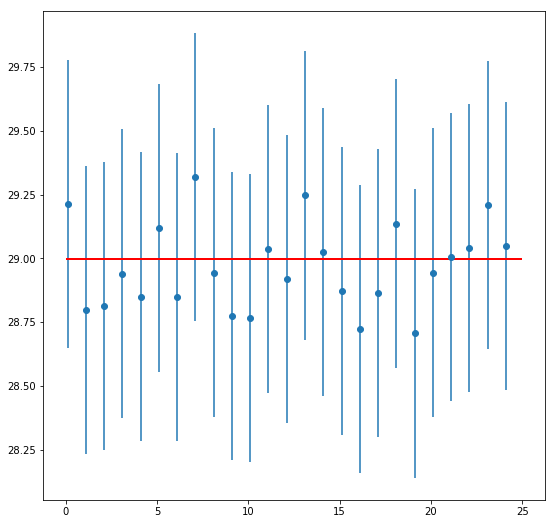

In [19]:
#Plot intervals
plt.figure(figsize=(9,9))
plt.errorbar(x=np.arange(0.1, 25, 1), 
             y=sample_means, 
             yerr=[(top-bot)/2 for top,bot in intervals],
             fmt='o')

plt.hlines(xmin=0, xmax=25,
           y=population_ages.mean(), 
           linewidth=2.0,
           color="red")